#### generate visualization results of the comparison

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
comparison_table = pd.read_csv('../../datasets/tissue_specific/comparison_table.csv')
compare_tissue_list = ['Adipose Subcutaneous','Artery Tibial','Breast Mammary Tissue','Colon Transverse','Nerve Tibial','Testis','Thyroid']
model_size_list = ['small','middle','large']

In [ ]:
comparison_table.head()

,tissue,model,size,acc,precision,recall,f1,auc
0,Adipose Subcutaneous,finetune,small,0.821,0.895,0.773,0.829,0.909
1,Adipose Subcutaneous,finetune,middle,0.836,0.853,0.853,0.853,0.914
2,Adipose Subcutaneous,finetune,large,0.703,0.660,0.745,0.700,0.805
3,Adipose Subcutaneous,e2e,small,0.590,0.579,1.000,0.733,0.492
4,Adipose Subcutaneous,e2e,middle,0.541,0.594,0.559,0.576,0.508


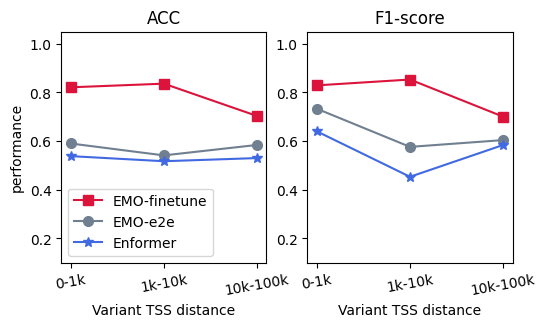

In [ ]:
compare_tissue_list = ['Adipose Subcutaneous']

for tissue in compare_tissue_list:

    tissue_table = comparison_table[comparison_table['tissue'] == tissue]
    small_table = tissue_table[tissue_table['size'] == 'small']
    middle_table = tissue_table[tissue_table['size'] == 'middle']
    large_table = tissue_table[tissue_table['size'] == 'large']

    fig = plt.figure(figsize=(9,3))
    x = np.arange(3) # small, middle, large

    # plot ACC
    plt.subplot(1, 3, 1)
    plt.title('ACC')
    plt.plot(x, [small_table[small_table['model'] == 'finetune']['acc'],
                middle_table[middle_table['model'] == 'finetune']['acc'],
                large_table[large_table['model'] == 'finetune']['acc']],
                's-',color='#DC143C', markersize=7, label='EMO-finetune')
    plt.plot(x, [small_table[small_table['model'] == 'e2e']['acc'],
                middle_table[middle_table['model'] == 'e2e']['acc'],
                large_table[large_table['model'] == 'e2e']['acc']],
                'o-',color='#708090', markersize=7, label='EMO-e2e')
    plt.plot(x, [small_table[small_table['model'] == 'enformer']['acc'],
                middle_table[middle_table['model'] == 'enformer']['acc'],
                large_table[large_table['model'] == 'enformer']['acc']],
                '*-',color='#4169E1', markersize=7, label='Enformer')

    plt.xticks([0,1,2],['0-1k','1k-10k','10k-100k'], rotation=10)
    plt.ylim((0.1, 1.05))
    plt.legend(loc = "best")
    plt.xlabel("Variant TSS distance")
    plt.ylabel("performance")

    # plot F1-score
    plt.subplot(1, 3, 2)
    plt.title('F1-score')
    plt.plot(x, [small_table[small_table['model'] == 'finetune']['f1'],
                middle_table[middle_table['model'] == 'finetune']['f1'],
                large_table[large_table['model'] == 'finetune']['f1']],
                's-',color='#DC143C', markersize=7, label='EMO-finetune')
    plt.plot(x, [small_table[small_table['model'] == 'e2e']['f1'],
                middle_table[middle_table['model'] == 'e2e']['f1'],
                large_table[large_table['model'] == 'e2e']['f1']],
                'o-',color='#708090', markersize=7, label='EMO-e2e')
    plt.plot(x, [small_table[small_table['model'] == 'enformer']['f1'],
                middle_table[middle_table['model'] == 'enformer']['f1'],
                large_table[large_table['model'] == 'enformer']['f1']],
                '*-',color='#4169E1', markersize=7, label='Enformer')

    plt.xticks([0,1,2],['0-1k','1k-10k','10k-100k'], rotation=10)
    plt.ylim((0.1, 1.05))
    plt.xlabel("Variant TSS distance")

    # plot AUC
    plt.subplot(1, 3, 3)
    plt.title('AUC')
    plt.plot(x, [small_table[small_table['model'] == 'finetune']['auc'],
                middle_table[middle_table['model'] == 'finetune']['auc'],
                large_table[large_table['model'] == 'finetune']['auc']],
                's-',color='#DC143C', markersize=7, label='EMO-finetune')
    plt.plot(x, [small_table[small_table['model'] == 'e2e']['auc'],
                middle_table[middle_table['model'] == 'e2e']['auc'],
                large_table[large_table['model'] == 'e2e']['auc']],
                'o-',color='#708090', markersize=7, label='EMO-e2e')
    plt.plot(x, [small_table[small_table['model'] == 'enformer']['auc'],
                middle_table[middle_table['model'] == 'enformer']['auc'],
                large_table[large_table['model'] == 'enformer']['auc']],
                '*-',color='#4169E1', markersize=8, label='Enformer')

    plt.xticks([0,1,2],['0-1k','1k-10k','10k-100k'], rotation=10)
    plt.ylim((0.1, 1.05))
    plt.xlabel("Variant TSS distance")

    plt.suptitle(tissue, fontsize=9)
    plt.savefig('images/' + tissue + '.png',dpi=300, bbox_inches = 'tight')
    plt.show()